In [12]:
import pandas as pd

# Load the uploaded dataset to inspect its structure
file_path = '../data/yv-data-4.csv'
unfiltered_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
unfiltered_data.head()


,MARK,MUDEL,VÄLJALASKEAASTA,ÜV,KORRAS ÜV,KORDUS ÜV,KORDUVA ÜV PROTSENT,SOIDUKITE ARV,SOIDUKITE VANUS
0,KRONE,SDP 27 ELB4-CS,2017,371,185,0,0.0,185,6.70
1,SCHMITZ CARGOBULL,SCS 24/L-13.62 MEGA,2017,176,88,0,0.0,88,1.96
2,MERCEDES-BENZ,ACTROS 1845LS,2017,113,54,0,0.0,54,14.42
3,SCHMITZ CARGOBULL,SKO 24/L-13.4 FP45 COOL,2017,103,50,0,0.0,50,1.96
4,SCHMITZ CARGOBULL,SKO 24/L-13.4 FP60 COOL,2017,93,47,0,0.0,47,1.96


In [16]:
# Translate and clean column names for easier handling
data.columns = [
    "Make",
    "Model",
    "Year_Built",
    "Total_Inspections",
    "Passed_Inspection",
    "Failed_Inspection",
    "Percentage_Failed",
    "Number_of_Vehicles",
    "Average_Age"
]

# Check for missing values and anomalies in the data
data.info()

# Display basic statistics to understand data ranges
data.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 18351 entries, 2 to 39804
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                18351 non-null  object 
 1   Model               18351 non-null  object 
 2   Year_Built          18351 non-null  int64  
 3   Total_Inspections   18351 non-null  int64  
 4   Passed_Inspection   18351 non-null  int64  
 5   Failed_Inspection   18351 non-null  int64  
 6   Percentage_Failed   18351 non-null  float64
 7   Number_of_Vehicles  18351 non-null  int64  
 8   Average_Age         18351 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1.4+ MB


,Year_Built,Total_Inspections,Passed_Inspection,Failed_Inspection,Percentage_Failed,Number_of_Vehicles,Average_Age
count,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000
mean,2000.541714,26.284290,22.718489,3.138685,8.918893,22.265163,13.570262
std,9.913456,76.793738,65.832025,11.112367,14.556178,64.790557,2.207872
min,1928.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.550000
25%,1995.000000,1.000000,1.000000,0.000000,0.000000,1.000000,12.260000
50%,2002.000000,4.000000,3.000000,0.000000,0.000000,3.000000,13.910000
75%,2008.000000,15.000000,13.000000,2.000000,14.290000,12.000000,14.420000
max,2017.000000,1523.000000,1213.000000,310.000000,100.000000,1205.000000,31.020000


In [17]:
# Define the list of car makers to filter
car_makers = [
    'MERCEDES-BENZ', 'BMW', 'FORD', 'HONDA', 'VOLKSWAGEN', 'VOLVO', 'SUZUKI', 'TOYOTA', 'OPEL', 'CHEVROLET',
    'AUDI', 'NISSAN', 'RENAULT', 'MITSUBISHI', 'FIAT', 'PEUGEOT', 'CITROEN', 'MAZDA', 'HYUNDAI', 'DODGE',
    'PORSCHE', 'CHRYSLER', 'KIA', 'LEXUS', 'CADILLACK', 'JEEP', 'SEAT', 'LAND ROVER', 'SKODA', 'SUBARU',
    'JAGUAR', 'SAAB', 'ALFA ROMEO', 'PONTIAC', 'LINCOLN', 'ISUZU', 'BUICK', 'DAEWOO', 'INFINITI', 'LANCIA',
    'DACIA', 'SMART'
]

# Filter the dataset to include only the specified car makers
data = data[data['Make'].isin(car_makers)]

# Check the filtered dataset
data.info()

# Display the first few rows of the filtered dataset
data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 18351 entries, 2 to 39804
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                18351 non-null  object 
 1   Model               18351 non-null  object 
 2   Year_Built          18351 non-null  int64  
 3   Total_Inspections   18351 non-null  int64  
 4   Passed_Inspection   18351 non-null  int64  
 5   Failed_Inspection   18351 non-null  int64  
 6   Percentage_Failed   18351 non-null  float64
 7   Number_of_Vehicles  18351 non-null  int64  
 8   Average_Age         18351 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1.4+ MB


,Make,Model,Year_Built,Total_Inspections,Passed_Inspection,Failed_Inspection,Percentage_Failed,Number_of_Vehicles,Average_Age
2,MERCEDES-BENZ,ACTROS 1845LS,2017,113,54,0,0.0,54,14.42
5,TOYOTA,AVENSIS,2017,88,0,0,0.0,87,10.94
7,SKODA,OCTAVIA,2017,75,0,0,0.0,75,8.26
9,VOLKSWAGEN,PASSAT,2017,48,0,0,0.0,48,15.27
21,VOLVO,FH16,2017,15,6,0,0.0,6,13.56


In [18]:
# Fill missing values in 'Average_Age' with the median value
median_age = data['Average_Age'].median()
data['Average_Age'].fillna(median_age, inplace=True)

# Verify that there are no missing values left
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18351 entries, 2 to 39804
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                18351 non-null  object 
 1   Model               18351 non-null  object 
 2   Year_Built          18351 non-null  int64  
 3   Total_Inspections   18351 non-null  int64  
 4   Passed_Inspection   18351 non-null  int64  
 5   Failed_Inspection   18351 non-null  int64  
 6   Percentage_Failed   18351 non-null  float64
 7   Number_of_Vehicles  18351 non-null  int64  
 8   Average_Age         18351 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1.4+ MB


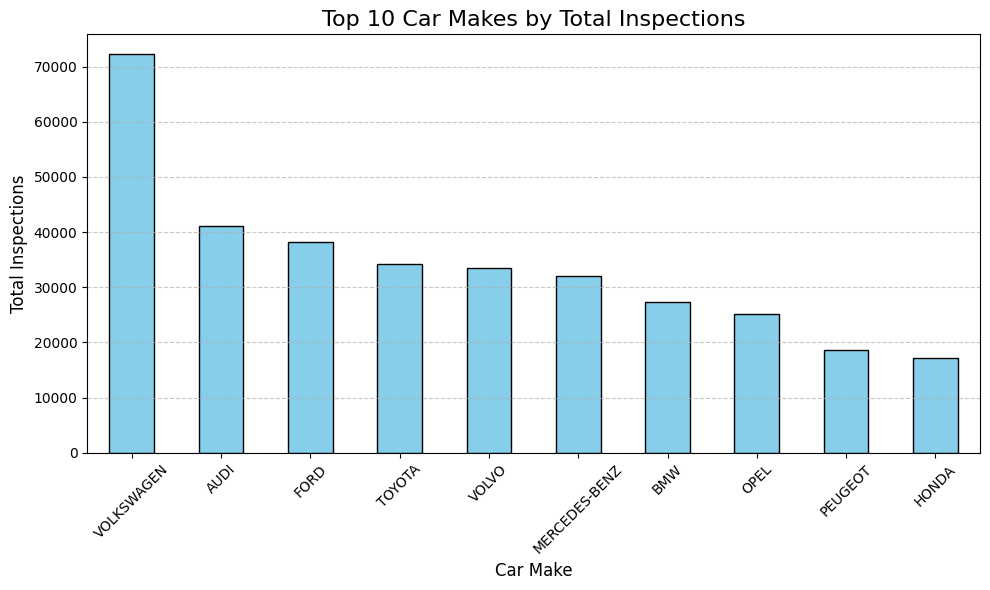

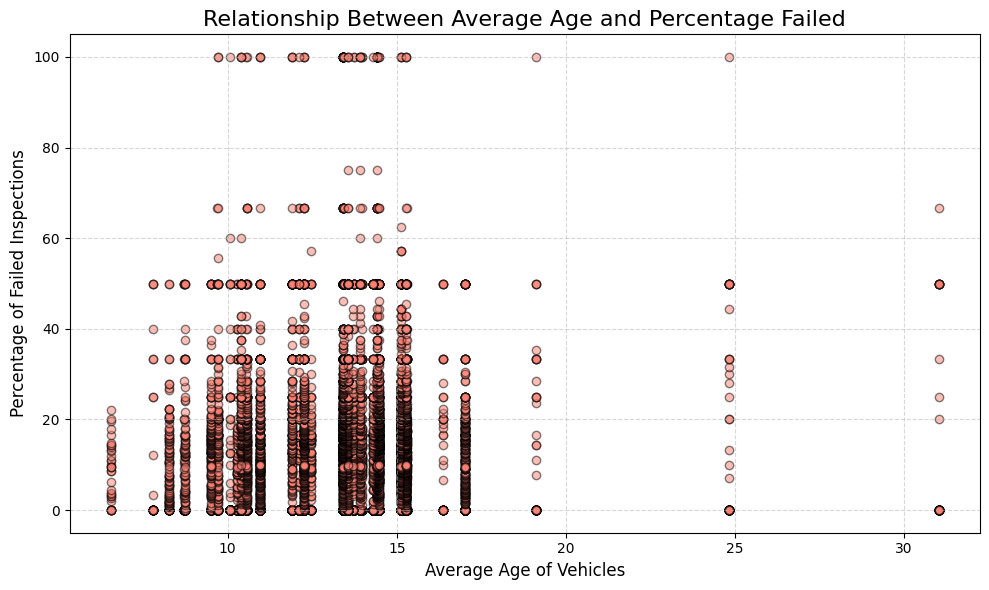

In [20]:
import matplotlib.pyplot as plt

# Top 10 car makes by total inspections
top_makes = data.groupby('Make')['Total_Inspections'].sum().sort_values(ascending=False).head(10)

# Bar chart for top 10 car makes by total inspections
plt.figure(figsize=(10, 6))
top_makes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Car Makes by Total Inspections', fontsize=16)
plt.ylabel('Total Inspections', fontsize=12)
plt.xlabel('Car Make', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Scatter plot: Relationship between Average Age and Percentage Failed
plt.figure(figsize=(10, 6))
plt.scatter(data['Average_Age'], data['Percentage_Failed'], alpha=0.5, color='salmon', edgecolor='black')
plt.title('Relationship Between Average Age and Percentage Failed', fontsize=16)
plt.xlabel('Average Age of Vehicles', fontsize=12)
plt.ylabel('Percentage of Failed Inspections', fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()


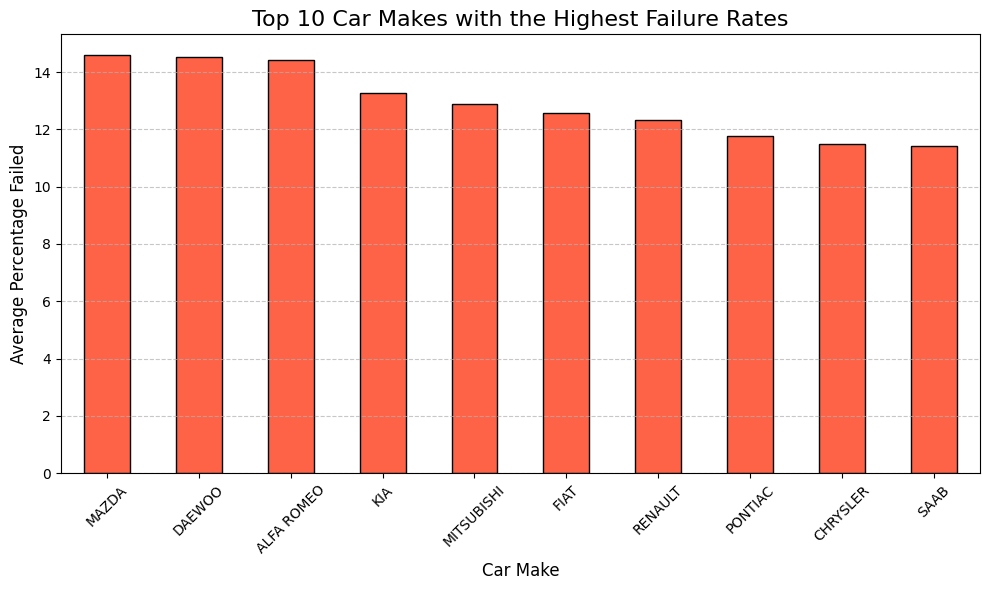

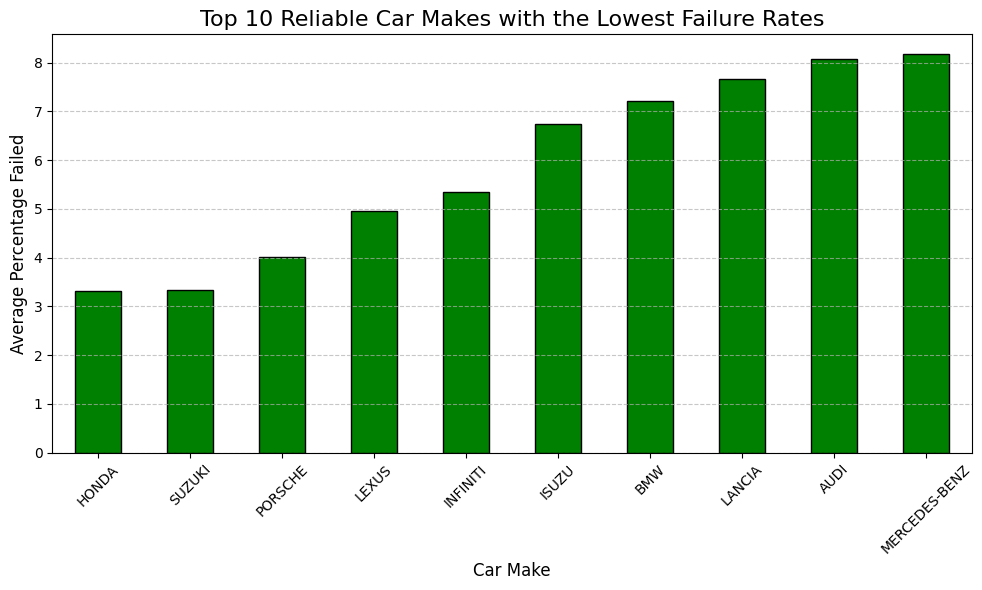

In [21]:
# Calculate average failure percentage by car make
failure_by_make = data.groupby('Make')['Percentage_Failed'].mean().sort_values(ascending=False).head(10)

# Bar chart for top 10 car makes with the highest failure rates
plt.figure(figsize=(10, 6))
failure_by_make.plot(kind='bar', color='tomato', edgecolor='black')
plt.title('Top 10 Car Makes with the Highest Failure Rates', fontsize=16)
plt.ylabel('Average Percentage Failed', fontsize=12)
plt.xlabel('Car Make', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Top 10 reliable car makes (lowest failure rates)
reliable_by_make = data.groupby('Make')['Percentage_Failed'].mean().sort_values(ascending=True).head(10)

# Bar chart for top 10 reliable car makes
plt.figure(figsize=(10, 6))
reliable_by_make.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Reliable Car Makes with the Lowest Failure Rates', fontsize=16)
plt.ylabel('Average Percentage Failed', fontsize=12)
plt.xlabel('Car Make', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
